<a href="https://colab.research.google.com/github/valyaler/innopolis/blob/master/%D0%94%D0%97_12_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.3 MB 37 kB/s 
     |████████████████████████████████| 198 kB 54.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=b92ad3f720d38c5c9e0627bf2ee5e0dfd0c7f8099e187c66685a47f86a777cee
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [ ]:
# загружаем библиотеки
import pandas as pd
import numpy as np

Отличия между датафреймом Spark и pandas: https://medium.com/@chris_bour/6-differences-between-pandas-and-spark-dataframes-1380cec394d2

In [ ]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession #to define a SparkSession

sc = SparkContext('local') #spark connection
spark = SparkSession(sc) # open spark_session

**1. Загрузите данные при помощи spark.read.csv из приложенного файла.**

Документация: https://spark.apache.org/docs/latest/sql-data-sources-csv.html

In [ ]:
# Используем options() чтобы задать несколько опций:
# header=True - Для чтения использует первую строку в качестве имен столбцов
# sep="," - Устанавливает разделитель для каждого поля и значения
# quote="" - Нужно установить пустую строку для отключения кавычки, тк quote по-умолчанию ", тк ковычки не являются разделителем
df = spark.read.options(sep=",", header=True).csv('iris.csv')

**2. Выведите 5 первых строк данных.**

In [ ]:
df.show(5) #указываем кол-во строк

+------------+-----------+------------+-----------+-------+
|sepal.length|sepal.width|petal.length|petal.width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|         .2| Setosa|
|         4.9|          3|         1.4|         .2| Setosa|
|         4.7|        3.2|         1.3|         .2| Setosa|
|         4.6|        3.1|         1.5|         .2| Setosa|
|           5|        3.6|         1.4|         .2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [ ]:
#выведем список колонок
df.columns

['sepal.length', 'sepal.width', 'petal.length', 'petal.width', 'variety']

In [ ]:
#преобразуем названия колонок, создав новый датафрейм
newColumns = ["sepal_length","sepal_width","petal_length","petal_width","variety"]

df_new = df.toDF(*newColumns)
df_new.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|         .2| Setosa|
|         4.9|          3|         1.4|         .2| Setosa|
|         4.7|        3.2|         1.3|         .2| Setosa|
|         4.6|        3.1|         1.5|         .2| Setosa|
|           5|        3.6|         1.4|         .2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import *
#from pyspark.sql.functions import col, udf
from pyspark.sql.types import DoubleType, IntegerType, DateType

In [ ]:
#преобразуем в другие типы данных
df_new = df_new \
    .withColumn('sepal_length', col('sepal_length').cast(DoubleType())) \
    .withColumn('sepal_width', col('sepal_width').cast(DoubleType())) \
    .withColumn('petal_length', col('petal_length').cast(DoubleType())) \
    .withColumn('petal_width', col('petal_width').cast(DoubleType()))

In [ ]:
#посмотрим на типы атрибутов
df_new.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- variety: string (nullable = true)



In [ ]:
#посмотрим на итоговый преобразованный датафрейм
df_new.show(5)

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa|
+------------+-----------+------------+-----------+-------+
only showing top 5 rows



**3. Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значение каждого из атрибутов
цветка ('sepal_length','sepal_width','petal_length','petal_width').**

Справочная информация: https://sparkbyexamples.com/spark/using-groupby-on-dataframe/

In [ ]:
#посмотрим на статистические показатели датафрейма
df_new.summary().show()

+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  variety|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335|  3.057333333333334|3.7580000000000027| 1.199333333333334|     null|
| stddev|0.8280661279778637|0.43586628493669793|1.7652982332594662|0.7622376689603467|     null|
|    min|               4.3|                2.0|               1.0|               0.1|   Setosa|
|    25%|               5.1|                2.8|               1.6|               0.3|     null|
|    50%|               5.8|                3.0|               4.3|               1.3|     null|
|    75%|               6.4|                3.3|               5.1|               1.8|     null|
|    max|               7.9|  

In [ ]:
#создадим функцию
def agg_func(attr):
  df_new.groupBy("variety")  \
    .agg(  \
      sum(attr),  \
      avg(attr),  \
      min(attr),  \
      max(attr))  \
    .show()

In [ ]:
#реализуем через цикл
for i in df_new.columns[:-1]:
  agg_func(i)

+----------+------------------+-----------------+-----------------+-----------------+
|   variety| sum(sepal_length)|avg(sepal_length)|min(sepal_length)|max(sepal_length)|
+----------+------------------+-----------------+-----------------+-----------------+
| Virginica| 329.3999999999999|6.587999999999998|              4.9|              7.9|
|    Setosa|250.29999999999998|5.005999999999999|              4.3|              5.8|
|Versicolor|             296.8|            5.936|              4.9|              7.0|
+----------+------------------+-----------------+-----------------+-----------------+

+----------+------------------+------------------+----------------+----------------+
|   variety|  sum(sepal_width)|  avg(sepal_width)|min(sepal_width)|max(sepal_width)|
+----------+------------------+------------------+----------------+----------------+
| Virginica|             148.7|2.9739999999999998|             2.2|             3.8|
|    Setosa|171.40000000000003| 3.428000000000001|       

**4. Постройте точечную диаграмму для petal_length и petal_width,
раскрашенный по типам цветков.**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#для построения визуализации преобразуем в тип датафрейма Pandas
df_new_sample = df_new.toPandas()

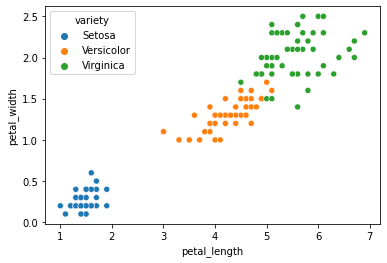

In [ ]:
sns.scatterplot(data = df_new_sample, x = "petal_length", y = "petal_width", hue = "variety")
plt.show()

**5. Посмотрите внимательно на получившийся график и сформируйте
правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS
ОТНОСИТСЯ К КЛАССУ SETOSA - ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ
(НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN).**

Если значение petal_length < 2.5 и petal_width < 1, то это класс Setosa, иначе - Unknown

**6. При помощи команд withColumn, when, otherwise создайте в датафрейме
новую колонку с таким предсказанием.**

In [ ]:
df_new_ex = df_new.withColumn("predict", \
                           when((df_new.petal_length < 2.5) & (df_new.petal_width < 1), lit("Setosa")) \
                           .otherwise(lit("Unknown"))
                           )

In [ ]:
df_new_ex.show(5)

+------------+-----------+------------+-----------+-------+-------+
|sepal_length|sepal_width|petal_length|petal_width|variety|predict|
+------------+-----------+------------+-----------+-------+-------+
|         5.1|        3.5|         1.4|        0.2| Setosa| Setosa|
|         4.9|        3.0|         1.4|        0.2| Setosa| Setosa|
|         4.7|        3.2|         1.3|        0.2| Setosa| Setosa|
|         4.6|        3.1|         1.5|        0.2| Setosa| Setosa|
|         5.0|        3.6|         1.4|        0.2| Setosa| Setosa|
+------------+-----------+------------+-----------+-------+-------+
only showing top 5 rows



**7. Проверьте качество своего предсказания.**

Для этого:

7.1. Подсчитайте количество строк, где Вы предсказали класс Setosa и
правильный класс был так же Setosa.

7.2. Подсчитайте количество строк, где Вы предсказали класс Setosa, а
правильный класс был какой-то другой (воспользуйтесь оператором "не
равно" - !=)

In [ ]:
df_new_ex.agg(
    count(when(col("variety") == "Setosa", True)), #сколько всего вариантов Setosa
    count(when((col("variety") == "Setosa") & (col("predict") == "Setosa"), True)), #сколько совпадений
    count(when((col("variety") != "Setosa") & (col("predict") == "Setosa"), True)) #сколько несовпадений
    ).show()

+-------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------------------------------------------+
|count(CASE WHEN (variety = Setosa) THEN true END)|count(CASE WHEN ((variety = Setosa) AND (predict = Setosa)) THEN true END)|count(CASE WHEN ((NOT (variety = Setosa)) AND (predict = Setosa)) THEN true END)|
+-------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------------------------------------------+
|                                               50|                                                                        50|                                                                               0|
+-------------------------------------------------+--------------------------------------------------------------------------+------------------------------------------